<a href="https://colab.research.google.com/github/GianfrancoE/EPH_2022_4/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# graficos incrustados
%matplotlib inline


In [2]:
from scipy import stats
import missingno

In [21]:
df = pd.read_csv('/content/usu_individual_T422.csv')
#dtype={'column_name': str})
#Me está warning que hay columnas en las que tengo diferentes tipos de datos. Podemos definir el dtype  option
#en el parametro read_csv. Si ponemos :str, todos los parámentros van a
#ser tratados como strings

<ipython-input-21-7dd0397cdbb4>:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/usu_individual_T422.csv')


In [ ]:
df.head(8).transpose()

In [ ]:
# Creamos un diccionario de mapeo para los nuevos nombres de las columnas
nuevos_nombres = {
    "CODUSU": "Cod_vivienda",
    "ANO4": "Año",
    "TRIMESTRE": "Trimestre",
    "NRO_HOGAR":"Código_Hogar",
    "REGION": "Región",
    "MAS_500": "¿Más de 500.000 habitantes?",
    "AGLOMERADO": "Aglomerado",
    "CH03": "Parentesco",
    "CH04": "Sexo",
    "CH05": "Fec_Nac",
    "CH06": "Edad",
    "CH07": "Estado_Civil",
    "CH08por": "Cobertura médica",
    "CH09": "Lee_y_Escribe",
    "CH10": "Asistió_a_establecimiento_educativo",
    "CH11": "Púlbico_o_privada",
    "CH12": "Nivel_más_alto_de_educación",
    "PP04G": "¿Dónde trabaja?",
    #Esto es donde tipo local, oficina, kiosko, etc
    "PP0B2_ANO": "Años en empleo (autónomo)",
    "PP06C": "Ingreso sin socios",
    "PP06D": "Ingreso con socios",
    "PP07A": "Tiempo en empleo",
    "PP08D1": "Sueldo",
    "PP09A": "Lugar de trabajo",
    #CABA, GBA, Ambos, otro
    "P21": "Monto ingreso ocupación ppal",
    "DECOCUR": "Decil ingreso"
 }

# Utilizamos el método rename para cambiar los nombres de las filas seleccionadas
df = df.rename(columns=nuevos_nombres)

# Imprimir el DataFrame actualizado
df.head(10)


In [ ]:
# Creamos un conjunto con los nombres de las columnas renombradas
columnas_renombradas = {
    "Cod_vivienda",
    "Año",
    "Trimestre",
    "Código_Hogar",
    "Región",
    "¿Más de 500.000 habitantes?",
    "Aglomerado",
    "Parentesco",
    "Sexo",
    "Fec_Nac",
    "Edad",
    "Estado_Civil",
    "Cobertura médica",
    "Lee_y_Escribe",
    "Asistió_a_establecimiento_educativo",
    "Púlbico_o_privada",
    "Nivel_más_alto_de_educación",
    "¿Dónde trabaja?",
    #Esto es donde tipo local, oficina, kiosko, etc
    "Años en empleo (autónomo)",
    "Ingreso sin socios",
    "Ingreso con socios",
    "Tiempo en empleo",
    "Sueldo",
    "Lugar de trabajo",
    #CABA, GBA, Ambos, otro
    "Monto ingreso ocupación ppal",
    "Decil ingreso"
 }

# Filtrar las columnas y mantener solo las renombradas
df = df.filter(items=columnas_renombradas)

# Imprimir el DataFrame actualizado
df.head(10)

In [ ]:
# Crear un diccionario de mapeo para los números y nombres de región
mapeo_regiones = {
    1: 'Gran Buenos Aires',
    40: 'Noroeste',
    41: 'Nordeste',
    42: 'Cuyo',
    43: 'Pampeana',
    44: 'Patagonia'
}

# Utilizar el método replace para cambiar los números por los nombres de región
df['Región'] = df['Región'].replace(mapeo_regiones)

# Imprimir el DataFrame actualizado
df.head(10)


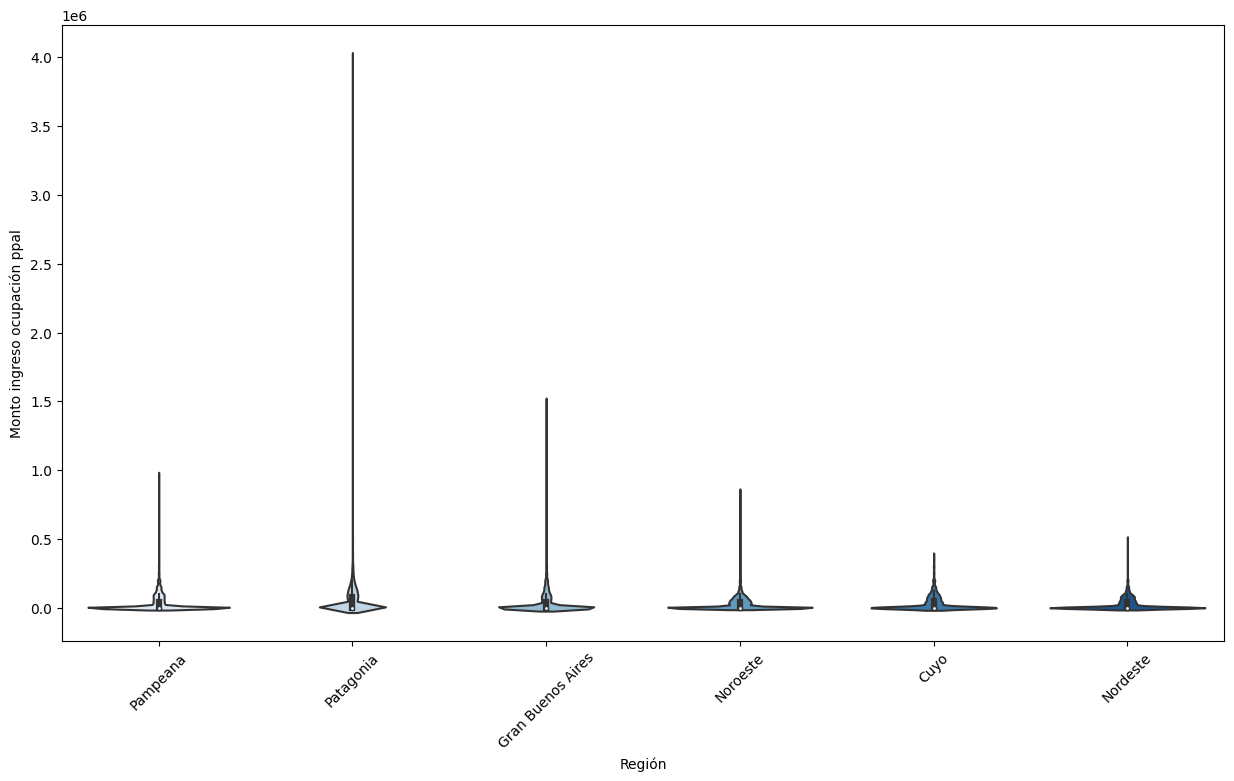

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(15, 8))

#sns.violinplot(x='Regionname', y ='Price', data=df, palette="Blues", iner= 'box', split = True)
#sns.violinplot(x='Regionname', y ='Price', data=df[df["Regionname"] != "Southern Metropolitan"],
#               palette="Blues", iner= 'box', split = True)

sns.violinplot(x='Región', y ='Monto ingreso ocupación ppal', data=df, palette="Blues", iner= 'box', split = True)

plt.xticks(rotation=45);

In [ ]:
# Filtrar y eliminar los valores "0" en la columna "Monto ingreso ocupación ppal"
df = df.loc[df['Monto ingreso ocupación ppal'] > 0]

# Imprimir el DataFrame actualizado
df.head(10)

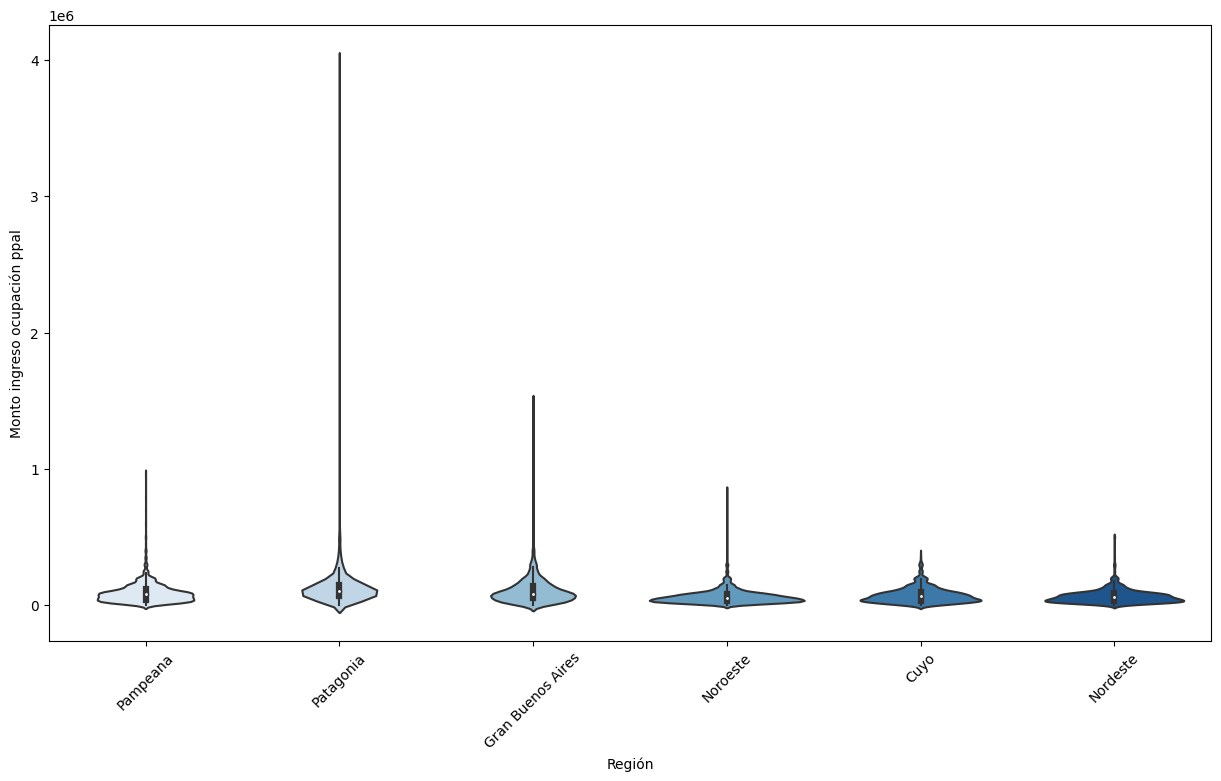

In [28]:
from matplotlib.pyplot import figure

figure(figsize=(15, 8))

#sns.violinplot(x='Regionname', y ='Price', data=df, palette="Blues", iner= 'box', split = True)
#sns.violinplot(x='Regionname', y ='Price', data=df[df["Regionname"] != "Southern Metropolitan"],
#               palette="Blues", iner= 'box', split = True)

sns.violinplot(x='Región', y ='Monto ingreso ocupación ppal', data=df, palette="Blues", iner= 'box', split = True)

plt.xticks(rotation=45);

In [ ]:
# Crear la nueva columna con el logaritmo de "Monto ingreso ocupación ppal"
df['Log_Monto'] = np.log(df['Monto ingreso ocupación ppal'])

# Imprimir el DataFrame actualizado
df.head(10)

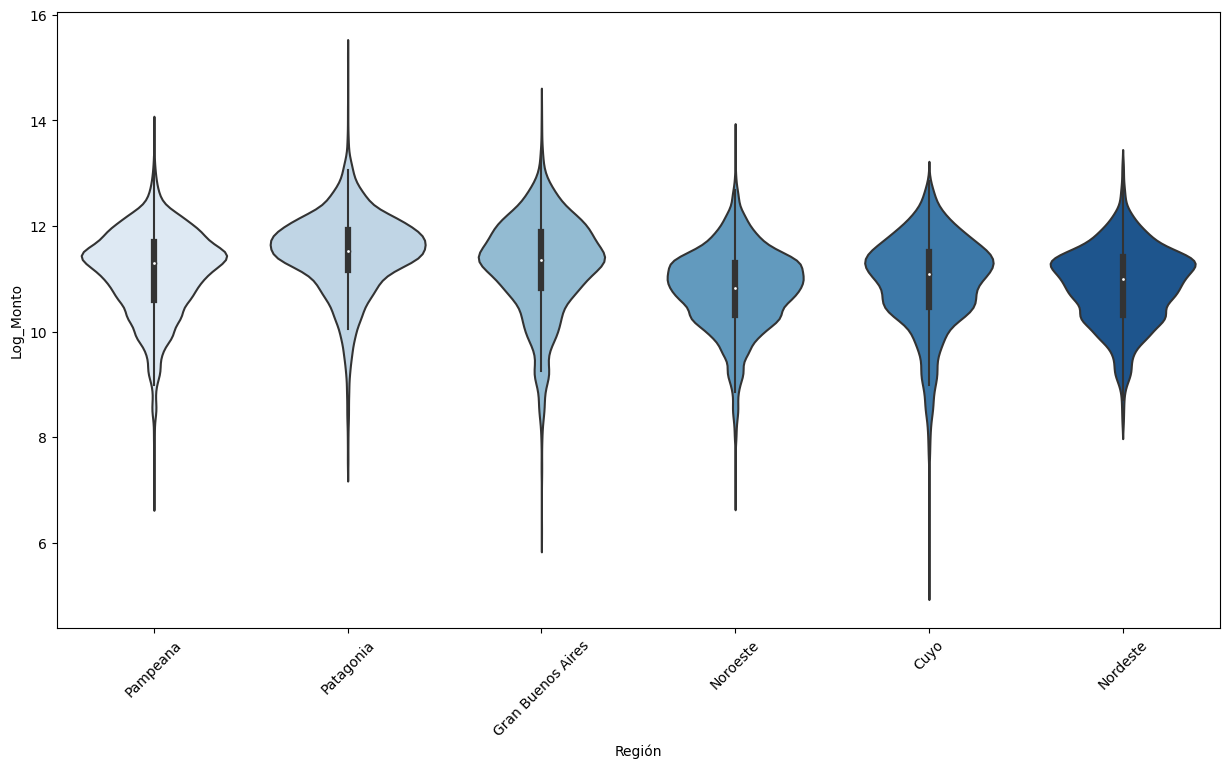

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(15, 8))

#sns.violinplot(x='Regionname', y ='Price', data=df, palette="Blues", iner= 'box', split = True)
#sns.violinplot(x='Regionname', y ='Price', data=df[df["Regionname"] != "Southern Metropolitan"],
#               palette="Blues", iner= 'box', split = True)

sns.violinplot(x='Región', y ='Log_Monto', data=df, palette="Blues", iner= 'box', split = True)

plt.xticks(rotation=45);

In [33]:
from scipy import stats

# Realizar el test de normalidad en la columna "Log_Monto"
statistic, p_value = stats.normaltest(df['Log_Monto'])

# Imprimir el resultado del test
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

Estadístico de prueba: 1311.9704120725853
Valor p: 1.2860113698269532e-285


In [34]:
# Calcular el ingreso medio por región
ingreso_medio_por_region = df.groupby('Región')['Monto ingreso ocupación ppal'].mean()

# Imprimir el resultado
print(ingreso_medio_por_region)

# Calcular el ingreso medio por región
desviación_por_region = df.groupby('Región')['Monto ingreso ocupación ppal'].std()

# Imprimir el resultado
print(desviación_por_region)

# Calcular la desviación estándar del dataframe
desviacion_total = df['Monto ingreso ocupación ppal'].std()

# Imprimir el resultado
print(desviacion_total)


Región
Cuyo                  76052.479541
Gran Buenos Aires    107105.394772
Nordeste              67647.378151
Noroeste              64113.951613
Pampeana              89563.835403
Patagonia            126886.701128
Name: Monto ingreso ocupación ppal, dtype: float64
Región
Cuyo                  55881.715291
Gran Buenos Aires     94376.989659
Nordeste              50213.703165
Noroeste              50889.945878
Pampeana              67426.953363
Patagonia            127199.765507
Name: Monto ingreso ocupación ppal, dtype: float64
78232.36234816899


In [35]:
from scipy import stats

# Realizar la prueba t independiente entre cada región y todas las demás regiones
regiones = df['Región'].unique()
p_values = {}

for region in regiones:
    grupo_actual = df[df['Región'] == region]['Monto ingreso ocupación ppal']
    grupos_comparacion = df[df['Región'] != region]['Monto ingreso ocupación ppal']

    statistic, p_value = stats.ttest_ind(grupo_actual, grupos_comparacion)
    p_values[region] = p_value

# Imprimir los valores p
for region, p_value in p_values.items():
    print(f"Región: {region}, Valor p: {p_value}")

Región: Pampeana, Valor p: 0.000616706733261257
Región: Patagonia, Valor p: 2.868878873660109e-147
Región: Gran Buenos Aires, Valor p: 1.8699035906296304e-41
Región: Noroeste, Valor p: 1.2267002197717654e-102
Región: Cuyo, Valor p: 5.044290897676137e-10
Región: Nordeste, Valor p: 2.0356874663398164e-26


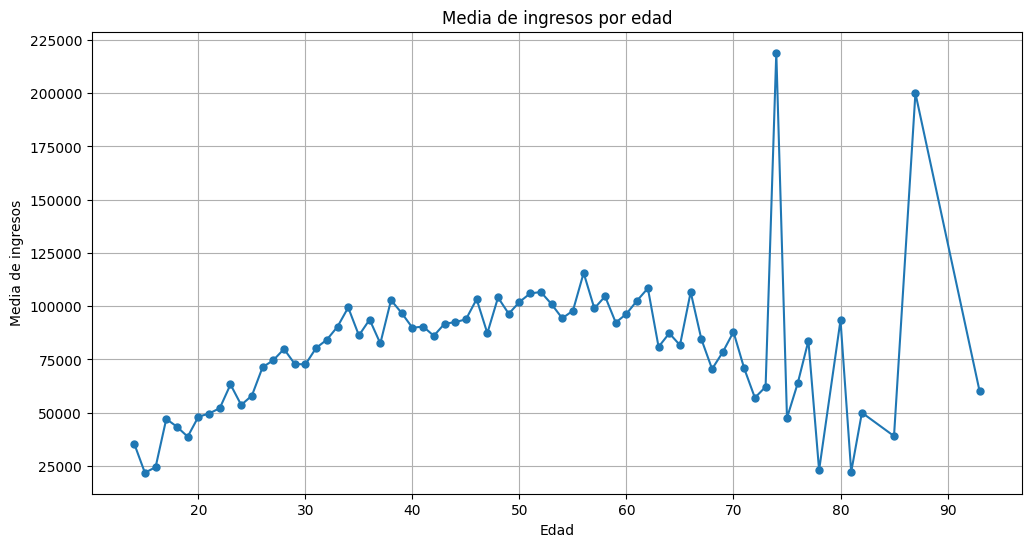

In [16]:
import matplotlib.pyplot as plt

# Calcular la media de ingresos por edad
media_ingresos_por_edad = df.groupby('Edad')['Monto ingreso ocupación ppal'].mean()

# Crear el dotplot
plt.figure(figsize=(12, 6))
plt.plot(media_ingresos_por_edad.index, media_ingresos_por_edad.values, 'o-', markersize=5)
plt.xlabel('Edad')
plt.ylabel('Media de ingresos')
plt.title('Media de ingresos por edad')
plt.grid(True)
plt.show()

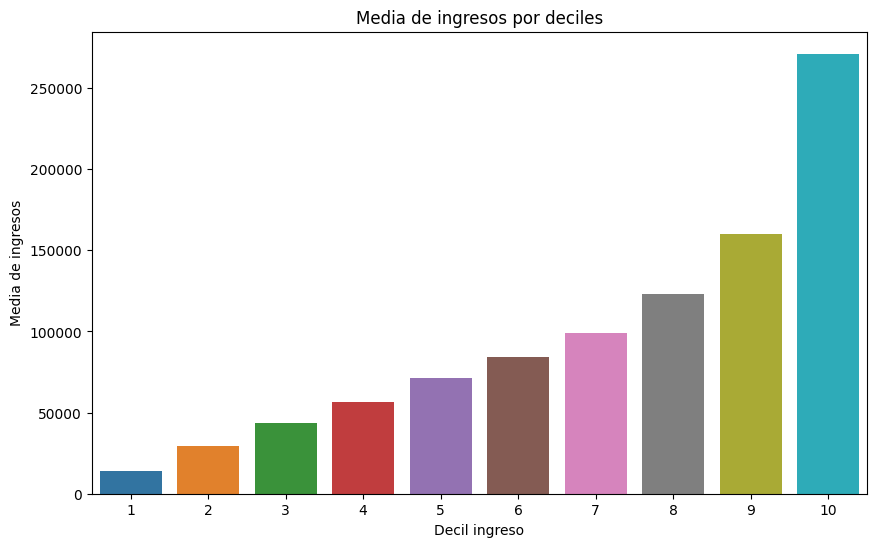

Decil 1: 13960.72
Decil 2: 29314.19
Decil 3: 43607.19
Decil 4: 56319.30
Decil 5: 71314.51
Decil 6: 84258.06
Decil 7: 99005.51
Decil 8: 123379.32
Decil 9: 160216.68
Decil 10: 271218.55


In [36]:
import seaborn as sns

# Calcular la media de ingresos por deciles
media_ingresos_por_decil = df.groupby('Decil ingreso')['Monto ingreso ocupación ppal'].mean()

# Crear el gráfico de barras utilizando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=media_ingresos_por_decil.index, y=media_ingresos_por_decil.values)
plt.xlabel('Decil ingreso')
plt.ylabel('Media de ingresos')
plt.title('Media de ingresos por deciles')
plt.xticks(rotation=0)
plt.show()

# Imprimir las medias de ingresos por decil
for decil, media in media_ingresos_por_decil.items():
    print(f'Decil {decil}: {media:.2f}')

In [ ]:
#Volvemos a resetear el dataframe para hacer una IA

df = pd.read_csv('/content/usu_individual_T422.csv')

# Creamos un diccionario de mapeo para los nuevos nombres de las columnas
nuevos_nombres = {
    "CODUSU": "Cod_vivienda",
    "ANO4": "Año",
    "TRIMESTRE": "Trimestre",
    "NRO_HOGAR":"Código_Hogar",
    "REGION": "Región",
    "MAS_500": "¿Más de 500.000 habitantes?",
    "AGLOMERADO": "Aglomerado",
    "CH03": "Parentesco",
    "CH04": "Sexo",
    "CH05": "Fec_Nac",
    "CH06": "Edad",
    "CH07": "Estado_Civil",
    "CH08por": "Cobertura médica",
    "CH09": "Lee_y_Escribe",
    "CH10": "Asistió_a_establecimiento_educativo",
    "CH11": "Púlbico_o_privada",
    "CH12": "Nivel_más_alto_de_educación",
    "PP04G": "¿Dónde trabaja?",
    #Esto es donde tipo local, oficina, kiosko, etc
    "PP0B2_ANO": "Años en empleo (autónomo)",
    "PP06C": "Ingreso sin socios",
    "PP06D": "Ingreso con socios",
    "PP07A": "Tiempo en empleo",
    "PP08D1": "Sueldo",
    "PP09A": "Lugar de trabajo",
    #CABA, GBA, Ambos, otro
    "P21": "Monto ingreso ocupación ppal",
    "DECOCUR": "Decil ingreso"
 }

# Utilizamos el método rename para cambiar los nombres de las filas seleccionadas
df = df.rename(columns=nuevos_nombres)

# Creamos un conjunto con los nombres de las columnas renombradas
columnas_renombradas = {
    "Cod_vivienda",
    "Año",
    "Trimestre",
    "Código_Hogar",
    "Región",
    "¿Más de 500.000 habitantes?",
    "Aglomerado",
    "Parentesco",
    "Sexo",
    "Fec_Nac",
    "Edad",
    "Estado_Civil",
    "Cobertura médica",
    "Lee_y_Escribe",
    "Asistió_a_establecimiento_educativo",
    "Púlbico_o_privada",
    "Nivel_más_alto_de_educación",
    "¿Dónde trabaja?",
    #Esto es donde tipo local, oficina, kiosko, etc
    "Años en empleo (autónomo)",
    "Ingreso sin socios",
    "Ingreso con socios",
    "Tiempo en empleo",
    "Sueldo",
    "Lugar de trabajo",
    #CABA, GBA, Ambos, otro
    "Monto ingreso ocupación ppal",
    "Decil ingreso"
 }

# Filtrar las columnas y mantener solo las renombradas
df = df.filter(items=columnas_renombradas)

# Crear un diccionario de mapeo para los números y nombres de región
# mapeo_regiones = {
#    1: 'Gran Buenos Aires',
#    40: 'Noroeste',
#    41: 'Nordeste',
#    42: 'Cuyo',
#    43: 'Pampeana',
#    44: 'Patagonia'
#}

# Utilizar el método replace para cambiar los números por los nombres de región
#df['Región'] = df['Región'].replace(mapeo_regiones)

# Filtrar y eliminar los valores "0" en la columna "Monto ingreso ocupación ppal"
df = df.loc[df['Monto ingreso ocupación ppal'] > 0]

# Imprimir el DataFrame actualizado
df.head(10)


Error (RMSE): 70355.75079318354


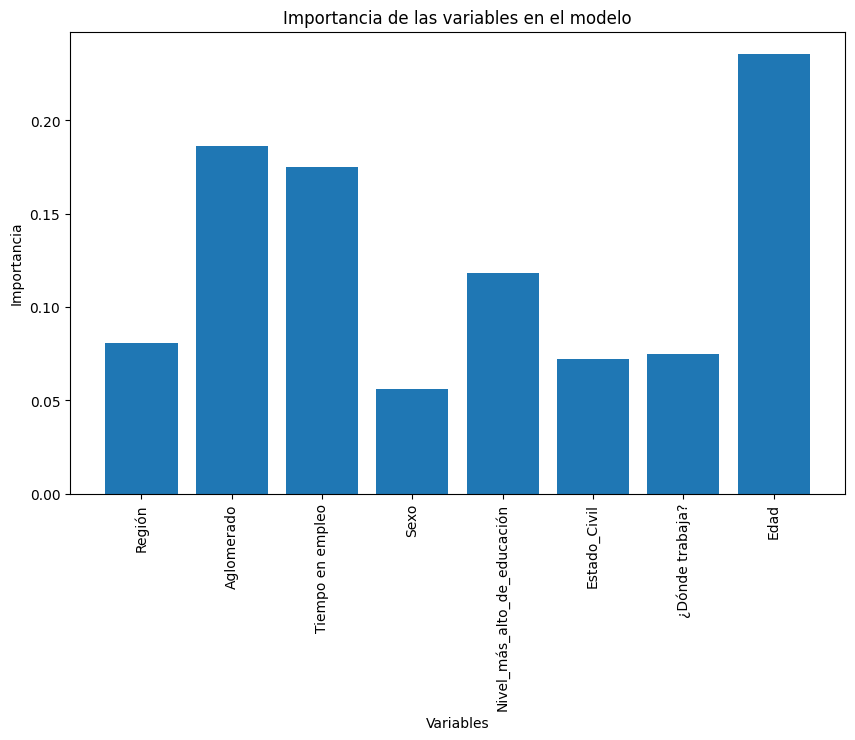

Número de datos de entrenamiento: 1716
Número de datos de error: 15449
Proporción de datos de entrenamiento: 0.09997087095834548
Proporción de datos de error: 0.9000291290416546
Coeficiente de determinación (R^2) - Entrenamiento: 0.8995963345175749
Coeficiente de determinación (R^2) - Prueba: 0.217244514286555


In [43]:
#HACEMOS LA IA

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_data, test_data = train_test_split(df, test_size=0.90, random_state=1)

# Definir las columnas de características (variables predictoras)
feature_cols = ['Región', 'Aglomerado', 'Tiempo en empleo', 'Sexo',
                'Nivel_más_alto_de_educación', 'Estado_Civil', '¿Dónde trabaja?', 'Edad']
# Definir la columna objetivo (variable a predecir)
target_col = "Monto ingreso ocupación ppal"

# Obtener las características y el objetivo para el conjunto de entrenamiento
X_train = train_data[feature_cols]
y_train = train_data[target_col]

# Obtener las características y el objetivo para el conjunto de prueba
X_test = test_data[feature_cols]
y_test = test_data[target_col]

# Crear el modelo de Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Entrenar el modelo utilizando el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error (RMSE) en el conjunto de prueba
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Error (RMSE):", rmse)

# Obtener la importancia de las variables
importances = model.feature_importances_

# Crear un gráfico de barras para visualizar la importancia de las variables
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_cols, importances)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo')
plt.xticks(rotation='vertical')
plt.show()

# Obtener el número de datos utilizados para entrenamiento y prueba
num_train_data = len(X_train)
num_test_data = len(X_test)

# Calcular el número de datos utilizados para el error
num_error_data = num_test_data

# Calcular el número de datos totales
num_total_data = num_train_data + num_test_data

# Calcular la proporción de datos utilizados para entrenamiento y error
train_data_ratio = num_train_data / num_total_data
error_data_ratio = num_error_data / num_total_data

# Imprimir la información sobre el número de datos utilizados
print("Número de datos de entrenamiento:", num_train_data)
print("Número de datos de error:", num_error_data)
print("Proporción de datos de entrenamiento:", train_data_ratio)
print("Proporción de datos de error:", error_data_ratio)

# Calcular el coeficiente de determinación (R^2) en el conjunto de entrenamiento
r2_train = model.score(X_train, y_train)

# Calcular el coeficiente de determinación (R^2) en el conjunto de prueba
r2_test = model.score(X_test, y_test)

# Imprimir el coeficiente de determinación (R^2) en el conjunto de entrenamiento y prueba
print("Coeficiente de determinación (R^2) - Entrenamiento:", r2_train)
print("Coeficiente de determinación (R^2) - Prueba:", r2_test)


In [20]:
from sklearn.feature_selection import RFECV
from itertools import compress

feature_cols = ["Región", "Aglomerado", "Tiempo en empleo", "Sexo", "Nivel_más_alto_de_educación",
                "Estado_Civil", "¿Dónde trabaja?", "Edad",
                "Asistió_a_establecimiento_educativo", "Código_Hogar", "Lee_y_Escribe"]

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)
rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)

# Obtener las variables seleccionadas por RFE
selected_features = list(compress(feature_cols, rfecv.support_))

# Imprimir las variables seleccionadas
print("Variables seleccionadas:", selected_features)

# Realizar predicciones en el conjunto de prueba utilizando las variables seleccionadas
X_test_selected = X_test[selected_features]
y_pred = rfecv.predict(X_test_selected)

# Calcular el error (RMSE) en el conjunto de prueba
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Error (RMSE):", rmse)

Variables seleccionadas: ['Región', 'Aglomerado', 'Tiempo en empleo', 'Sexo', 'Nivel_más_alto_de_educación', 'Estado_Civil', '¿Dónde trabaja?', 'Edad']
Error (RMSE): 70968.56364906144
